In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings

In [2]:
df1=pd.read_csv(r'C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\Results\Denoising\Deep learning\Set12\Set12_results.csv')
df2=pd.read_csv(r'C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\Results\Denoising\Wavelet+NLMeans\Set12\Set12_results.csv')
df3=pd.read_csv(r'C:\Users\ajayr\Documents\Masters\3rd Sem\Digital Image Processing\Project\Results\Enhancement\Set12\Set12_results.csv')

In [3]:
def plot_grouped_bar_chart(df1, df2, df3, target_noise_type1,target_noise_type2,target_noise_type3):
    # Filter dataframes based on target_noise_type
    df1_filtered = df1[df1['Noise Type'] == target_noise_type1]
    df2_filtered = df2[df2['Noise Type'] == target_noise_type2]
    df3_filtered = df3[df3['Noise Type'] == target_noise_type3]

    # Drop unnecessary columns
    df_dropped1 = df1_filtered.drop(['Unnamed: 0', 'Noise Type'], axis=1)
    df_dropped2 = df2_filtered.drop(['Unnamed: 0', 'Noise Type'], axis=1)
    df_dropped3 = df3_filtered.drop(['Unnamed: 0', 'Noise Type'], axis=1)

    # Convert dataframes to float
    mean_df1 = df_dropped1.astype(float)
    mean_df2 = df_dropped2.astype(float)
    mean_df3 = df_dropped3.astype(float)

    # Calculate mean values
    mean_df1 = mean_df1.select_dtypes(include='number').mean()
    mean_df2 = mean_df2.select_dtypes(include='number').mean()
    mean_df3 = mean_df3.select_dtypes(include='number').mean()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    # Calculate the differences
        array1 = [mean_df1[i + 1] - mean_df1[i] for i in range(0, len(mean_df1), 2)]
        array2 = [mean_df2[i + 1] - mean_df2[i] for i in range(0, len(mean_df2), 2)]
        array3 = [mean_df3[i + 1] - mean_df3[i] for i in range(0, len(mean_df3), 2)]

    # Number of bars
    num_bars = len(array1)

    # Set the width of the bars
    bar_width = 0.25

    # Set the positions of the bars on X-axis
    r1 = np.arange(num_bars)
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plotting the grouped bar chart
    plt.bar(r1, array1, color='blue', width=bar_width, edgecolor='grey', label='U-Net')
    plt.bar(r2, array2, color='orange', width=bar_width, edgecolor='grey', label='Wavelet+NLmeans')
    plt.bar(r3, array3, color='green', width=bar_width, edgecolor='grey', label='Histogram Matching')

    # Adding labels
    plt.xlabel('Types of IQA')
    plt.ylabel('Performance')
    plt.title('Grouped Bar Chart')
    plt.xticks([r + bar_width for r in range(num_bars)], ['PSNR', 'SSIM', 'CW_SSIM', 'Unique', 'MSUnique', 'CSV', 'SUMMER'])

    # Adding legend
    plt.legend()

    # Show the plot
    plt.show()

# Contrast_Adjusted

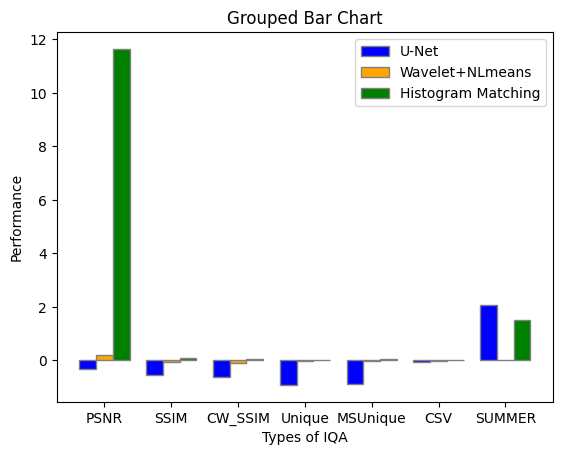

In [4]:
plot_grouped_bar_chart(df1, df2, df3, "Contrast Adjusted","Contrast Adjusted","Contrast Adjusted")

# Random Noise

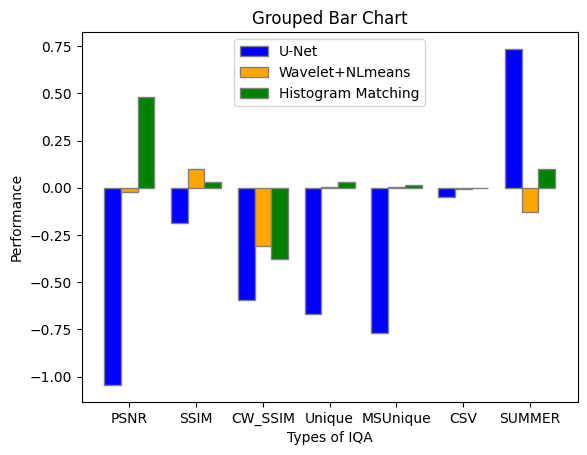

In [5]:
plot_grouped_bar_chart(df1, df2, df3, "Noise","Noise","Noise")

# Overexposure

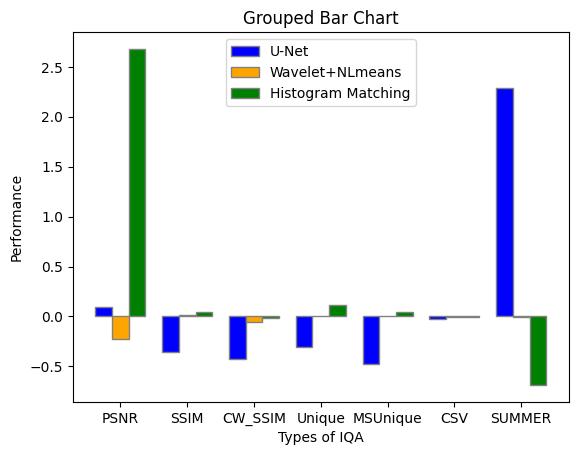

In [6]:
plot_grouped_bar_chart(df1, df2, df3, "Overexposure","Overexposure","Overexposure")

# Underexposure

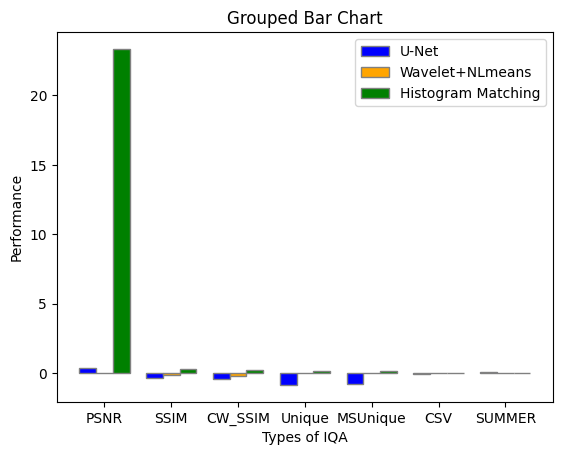

In [7]:
plot_grouped_bar_chart(df1, df2, df3, "Underexposure","Underexposure","Underexposure")